## Image Colour Compression using Principal Component Analysis

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Load Image

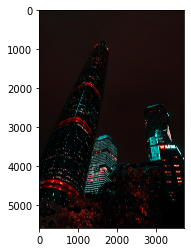

In [2]:
img = cv2.cvtColor(cv2.imread('images_datasets/pexels-example2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Image Properties

In [3]:
img.shape

(5580, 3720, 3)

Split Image and Display

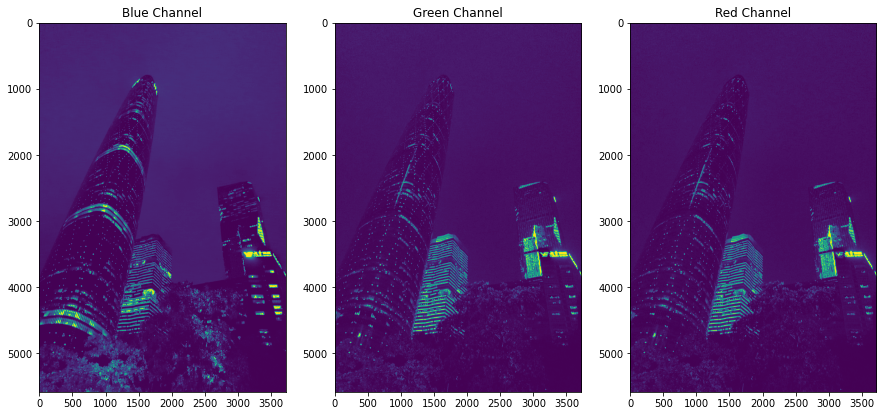

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

Blue channel dataframe

In [5]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,3710,3711,3712,3713,3714,3715,3716,3717,3718,3719
0,25,23,22,20,24,24,21,17,14,14,...,27,30,30,31,31,28,25,24,24,23
1,20,19,18,22,25,25,23,19,16,17,...,30,29,25,28,29,25,23,25,26,27
2,18,19,18,22,24,27,25,21,18,19,...,30,24,20,24,27,25,24,26,30,32
3,22,20,20,20,23,25,24,22,19,20,...,26,20,19,23,26,27,28,30,31,31
4,22,21,20,19,22,22,26,25,18,19,...,21,24,22,24,26,30,34,36,30,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,32,32,29,23,25,28,27,20,17,19,...,0,0,1,2,3,4,4,3,2,1
5576,32,29,26,23,25,25,24,22,19,17,...,1,1,0,0,0,0,1,0,0,0
5577,29,27,24,22,23,24,24,21,21,18,...,1,1,0,0,0,0,1,0,0,0
5578,25,24,21,20,22,22,23,23,21,21,...,1,1,0,0,0,0,1,0,0,0


I will divide all the data of all channels by 255 so that the data is scaled between 0 and 1.

In [6]:
df_blue = blue/255
df_green = green/255
df_red = red/255

We already have seen that each channel has 3720 dimensions, and we will now consider only 50 dimensions for PCA and fit and transform the data and check how much variance is explained after reducing data to 50 dimensions.

In [7]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

We have fitted the data in PCA, let’s check the shape of the transformed image of each channel:

In [8]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(5580, 50)
(5580, 50)
(5580, 50)


That is as expected. Let’s check the sum of explained variance ratios of the 50 PCA components (i.e. most dominated 50 Eigenvalues) for each channel.

In [9]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.7815691595385763
Green Channel: 0.801925955662589
Red Channel  : 0.810036118752601


Wow, that’s superb! because only using 50 components we can keep around 80% of the variance in the data.
Let's plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels:

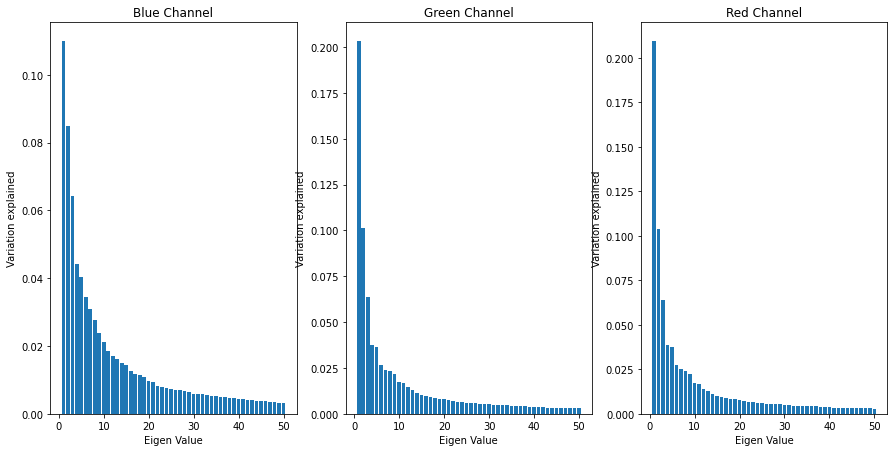

In [10]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

Image Reconstruct : We have completed our PCA dimensionality reduction. Now we will visualize the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one. Let’s proceed.

In [11]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(5580, 3720) (5580, 3720) (5580, 3720)


We can inverse transform the data to the original shape (although each channel is still separated), but as we know all the images are already compressed.
We will merge all the channels into one and print the final shape:

In [12]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(5580, 3720, 3)


That’s great to see the exact shape of the original image that we had imported at the very beginning. Now we will display both the Images (original and reduced) side by side.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


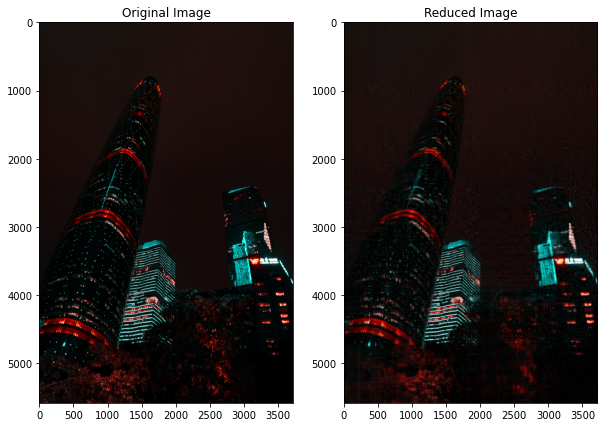

In [13]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

It's amazing to see that the compressed image is very similar (at least we can still identify it as same) to that of the original one although we have reduced the dimension individually for each channel to only 50 from 3720. But, we have achieved our goal. No doubt that now the reduced image will be processed much faster by the computer.


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [3]:
import os

Interactive Widget

In [5]:
#location of image dataset
img_dir = 'images_datasets/'  
@interact
#defining compression function
def compression(image=os.listdir(img_dir), k=IntSlider(min=20, max=200, 
                             step=1,value=40,  continuous_update=False, 
                                         layout=dict(width='100%'))):

                        

   #loading the image and reshaping it as done above
    img = cv2.cvtColor(cv2.imread(img_dir + image), cv2.COLOR_BGR2RGB)
    #Splitting into channels
    blue,green,red = cv2.split(img)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255

    pca_b = PCA(n_components=k)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g = PCA(n_components=k)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r = PCA(n_components=k)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)

    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)

    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

    fig = plt.figure(figsize=(16, 6)) 
    fig.add_subplot(121)
    plt.title("Original Image")
    plt.imshow(img)
    fig.add_subplot(122)
    plt.title("Reduced Image")
    plt.imshow(img_reduced)
    plt.show()

    

interactive(children=(Dropdown(description='image', options=('pexels-bess-hamiti-36764.jpg', 'pexels-bruno-the…

In [ ]:
# import matplotlib
    
    #to save the compressed image to directory
    # matplotlib.image.imsave('Compressed.jpg', k_img)